# Classificador de Spam / Ham com Naive Bayes

Produzindo um classificador de Naive Bayes para predizer se uma mensagem de e-mail é ou não spam.

# Índice

#### <a href='#parte1'>Parte 1: Exploração e análise do dataset</a>

#### <a href='#parte2'>Parte 2: Implementação do classificador gaussiano e comparação com KNN</a>

#### <a href='#parte3'>Parte 3: Adaptação das features</a>

#### <a href='#parte4'>Parte 4: Aplicação do classificador binário e comparação com KNN</a>

#### <a href='#parte5'>Parte 5: Avaliação do classificador</a>

#### <a href='#parte6'>Parte 6: Salvando os resultados</a>

<a id='parte1'></a>

# Parte 1: Exploração e análise do dataset

## 1.1. Importação de bibliotecas utilizadas

Antes de iniciar a exploração dos dados, é imprescindível importar as bibliotecas que serão usadas neste trabalho.

In [1]:
#bliblioteca para facilitar as operações vetoriais e matriciais 
import numpy as np

#biblioteca para facilitar a organização do dataset
import pandas as pd

#blibliotecas de visualização gráfica
import matplotlib as plt
import seaborn as sns

#biblioteca de machine learning
import sklearn

## 1.2. Contato inicial com os dados

Fazendo o upload do dataset de treino:

In [2]:
data_raw = pd.read_csv("train_data.csv")

Para ter um primeiro contato com a base de dados:

In [3]:
data_raw.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.00,14.28,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.800,5,9,True,1947
1,0.00,0.00,1.00,0.0,0.50,0.00,0.00,0.00,0.0,0.50,...,0.357,0.000,0.892,0.000,0.000,2.000,19,172,False,2159
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.29,0.0,0.43,...,0.124,0.000,0.310,0.062,0.000,1.477,8,65,False,4223
3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.000,0.444,0.000,0.000,2.800,7,28,True,2624
4,0.00,0.00,0.00,0.0,1.17,0.00,0.00,0.00,0.0,1.17,...,0.000,0.000,0.000,0.000,0.000,1.551,10,45,True,2743
5,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,True,3451
6,0.00,0.00,0.37,0.0,0.00,0.00,0.37,0.00,0.0,0.00,...,0.302,0.000,0.241,0.060,0.000,2.166,18,143,False,464
7,0.00,3.03,0.00,0.0,0.00,0.00,0.00,0.00,0.0,3.03,...,0.000,0.000,0.000,0.000,0.000,2.769,21,36,True,3219
8,0.09,0.00,0.48,0.0,0.00,0.29,0.00,0.00,0.0,0.09,...,0.030,0.000,0.000,0.046,0.000,1.722,17,267,True,3007
9,0.00,0.00,0.66,0.0,0.00,0.66,0.00,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,1.142,4,56,True,1549


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 59 columns):
word_freq_make                3680 non-null float64
word_freq_address             3680 non-null float64
word_freq_all                 3680 non-null float64
word_freq_3d                  3680 non-null float64
word_freq_our                 3680 non-null float64
word_freq_over                3680 non-null float64
word_freq_remove              3680 non-null float64
word_freq_internet            3680 non-null float64
word_freq_order               3680 non-null float64
word_freq_mail                3680 non-null float64
word_freq_receive             3680 non-null float64
word_freq_will                3680 non-null float64
word_freq_people              3680 non-null float64
word_freq_report              3680 non-null float64
word_freq_addresses           3680 non-null float64
word_freq_free                3680 non-null float64
word_freq_business            3680 non-null float64
word_freq

In [214]:
data_raw.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,0.099677,0.223353,0.279019,0.069117,0.314897,0.096147,0.113372,0.107397,0.088519,0.242079,...,0.041071,0.138068,0.017707,0.273364,0.075168,0.043326,5.364929,52.831250,283.316304,2297.439674
std,0.298270,1.337420,0.508617,1.438505,0.697633,0.277443,0.400638,0.411901,0.265593,0.671435,...,0.257327,0.268595,0.111465,0.872148,0.239671,0.345457,33.811679,210.367337,623.433481,1324.109165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,34.000000,1160.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.280000,14.000000,93.000000,2298.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.191000,0.000000,0.313250,0.050000,0.000000,3.716000,43.000000,270.500000,3445.250000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,13.129000,1102.500000,9989.000000,15841.000000,4600.000000


In [5]:
len(data_raw) == len(data_raw.dropna())

True

A base de treino tem, assim, 3680 entradas e nenhum dado faltante.

## 1.3. Análise de features 

Segundo a documentação do próprio dataset fornecida, as features apresentadas representam o seguinte:

São 48 atributos contínuos e reais [0,100] do tipo word_freq_PALAVRA, representando a porcentagem de vezes que o termo PALAVRA aparece no e-mail.

6 atributos contínuos e reais [0,100] do tipo char_freq_CARACTERE, representando a quantidade de caracteres no email iguais a CARACTERE.

1 atributo contínuo real contendo o comprimento médio de sequências de carateres maiúsculos no e-mail.

1 atributo contínuo inteiro contendo o tamanho da maior sequência de caracteres maiúsculos no e-mail.

1 atributo contínuo inteiro contendo o número total de letras maiúsculas no e-mail.

In [6]:
data_raw.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Assim, algumas das palavras contadas são "internet", "mail", "money".

Os caracteres contados são ; ( [ ! $ # .

### 1.3.1. Análise de palavras

#### 1.3.1.1. Análise de "money"

Vamos analisar, primeiramente, a influência do termo "money" na classificação.

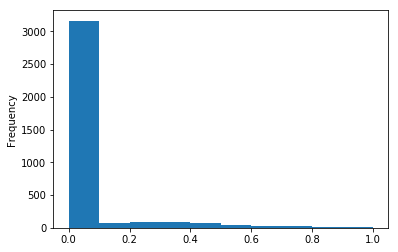

In [7]:
data_raw["word_freq_money"].plot.hist(range=[0, 1])

Esse é o histograma relativo à porcentagem de "money", no dataset de treino inteiro. No entanto, para poder separar melhor e entender a inflluência real do termo, vamos separar a base entre os emails spam e ham.

In [8]:
spam = data_raw[data_raw["ham"] == False]

In [9]:
spam["ham"].value_counts()

False    1429
Name: ham, dtype: int64

In [10]:
ham = data_raw[data_raw["ham"] == True]

In [11]:
ham["ham"].value_counts()

True    2251
Name: ham, dtype: int64

Agora que isso já está feito, analisemos a incidência da palavra "money":

In [12]:
money_spam = spam.word_freq_money.mean()
print("A porcentagem média de aparição da palavra money nos emails spam é de %.4f." %(money_spam))

A porcentagem média de aparição da palavra money nos emails spam é de 0.2135.


In [13]:
money_ham = ham.word_freq_money.mean()
print("A porcentagem média de aparição da palavra money nos emails ham é de %.4f." %(money_ham))

A porcentagem média de aparição da palavra money nos emails ham é de 0.0187.


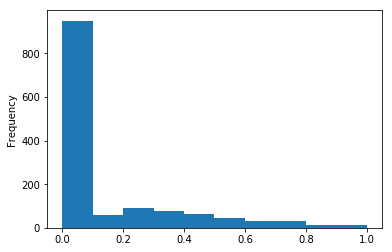

In [14]:
spam.word_freq_money.plot.hist(range=[0, 1])

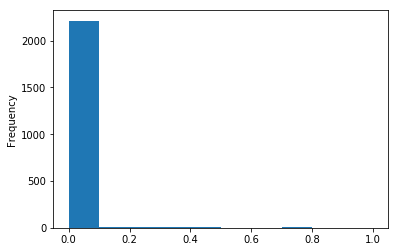

In [15]:
ham.word_freq_money.plot.hist(range=[0, 1])

Assim, a diferença é gritante! É, com certeza, um parâmetro a ser levado em conta na classificação.

#### 1.3.1.2. Análise de "free"

In [16]:
free_spam = spam.word_freq_free.mean()
print("A porcentagem média de aparição da palavra free nos emails spam é de %.4f." %(free_spam))

A porcentagem média de aparição da palavra free nos emails spam é de 0.5370.


In [17]:
free_ham = ham.word_freq_free.mean()
print("A porcentagem média de aparição da palavra free nos emails ham é de %.4f." %(free_ham))

A porcentagem média de aparição da palavra free nos emails ham é de 0.0736.


#### 1.3.1.3. Análise de "george"

In [18]:
george_spam = spam.word_freq_george.mean()
print("A porcentagem média de aparição da palavra george nos emails spam é de %.4f." %(george_spam))

A porcentagem média de aparição da palavra george nos emails spam é de 0.0017.


In [19]:
george_ham = ham.word_freq_george.mean()
print("A porcentagem média de aparição da palavra george nos emails ham é de %.4f." %(george_ham))

A porcentagem média de aparição da palavra george nos emails ham é de 1.2381.


### 1.3.2. Análise de caracteres

#### 1.3.2.1. Análise de "!"

In [20]:
exclamacao_spam = spam["char_freq_!"].mean()
print("A porcentagem média de aparição do caractere ! nos emails spam é de %.4f." %(exclamacao_spam))

A porcentagem média de aparição do caractere ! nos emails spam é de 0.5190.


In [21]:
exclamacao_ham = ham["char_freq_!"].mean()
print("A porcentagem média de aparição do caractere ! nos emails ham é de %.4f." %(exclamacao_ham))

A porcentagem média de aparição do caractere ! nos emails ham é de 0.1174.


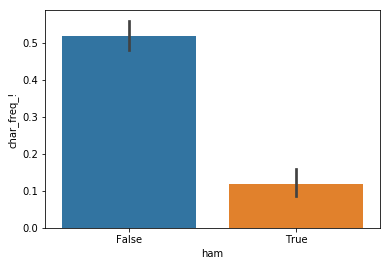

In [217]:
sns.barplot(y="char_freq_!", data=data_raw, x="ham")

#### 1.3.2.2. Análise de "$"

In [22]:
cifrao_spam = spam["char_freq_$"].mean()
print("A porcentagem média de aparição do caractere $ nos emails spam é de %.4f." %(cifrao_spam))

A porcentagem média de aparição do caractere $ nos emails spam é de 0.1733.


In [23]:
cifrao_ham = ham["char_freq_$"].mean()
print("A porcentagem média de aparição do caractere $ nos emails ham é de %.4f." %(cifrao_ham))

A porcentagem média de aparição do caractere $ nos emails ham é de 0.0129.


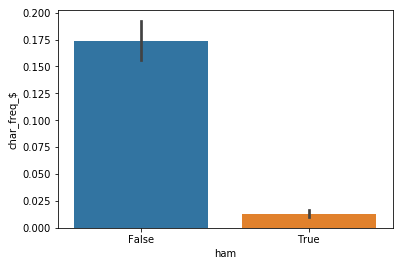

In [218]:
sns.barplot(y="char_freq_$", data=data_raw, x="ham")

#### 1.3.2.3. Análise de "#"

In [24]:
hash_spam = spam["char_freq_#"].mean()
print("A porcentagem média de aparição do caractere # nos emails spam é de %.4f." %(hash_spam))

A porcentagem média de aparição do caractere # nos emails spam é de 0.0734.


In [25]:
hash_ham = ham["char_freq_#"].mean()
print("A porcentagem média de aparição do caractere # nos emails ham é de %.4f." %(hash_ham))

A porcentagem média de aparição do caractere # nos emails ham é de 0.0242.


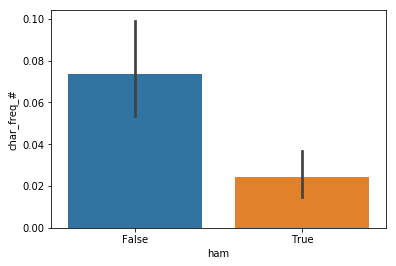

In [219]:
sns.barplot(y="char_freq_#", data=data_raw, x="ham")

#### 1.3.2.4. Análise de "("

In [26]:
par_spam = spam["char_freq_("].mean()
print("A porcentagem média de aparição do caractere ( nos emails spam é de %.4f." %(par_spam))

A porcentagem média de aparição do caractere ( nos emails spam é de 0.1105.


In [27]:
par_ham = ham["char_freq_("].mean()
print("A porcentagem média de aparição do caractere ( nos emails ham é de %.4f." %(par_ham))

A porcentagem média de aparição do caractere ( nos emails ham é de 0.1556.


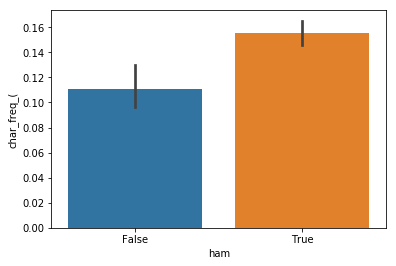

In [220]:
sns.barplot(y="char_freq_(", data=data_raw, x="ham")

#### 1.3.2.5. Análise de ";"

In [28]:
pev_spam = spam["char_freq_;"].mean()
print("A porcentagem média de aparição do caractere ; nos emails spam é de %.4f." %(pev_spam))

A porcentagem média de aparição do caractere ; nos emails spam é de 0.0221.


In [29]:
pev_ham = ham["char_freq_;"].mean()
print("A porcentagem média de aparição do caractere ; nos emails ham é de %.4f." %(pev_ham))

A porcentagem média de aparição do caractere ; nos emails ham é de 0.0531.


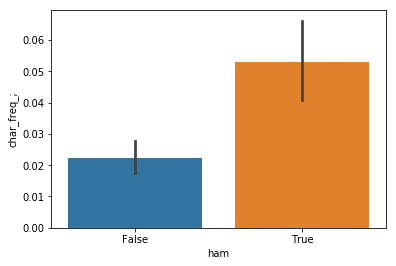

In [221]:
sns.barplot(y="char_freq_;", data=data_raw, x="ham")

#### 1.3.2.6. Análise de "["

In [30]:
brackets_spam = spam["char_freq_["].mean()
print("A porcentagem média de aparição do caractere [ nos emails spam é de %.4f." %(brackets_spam))

A porcentagem média de aparição do caractere [ nos emails spam é de 0.0085.


In [31]:
brackets_ham = ham["char_freq_["].mean()
print("A porcentagem média de aparição do caractere [ nos emails ham é de %.4f." %(brackets_ham))

A porcentagem média de aparição do caractere [ nos emails ham é de 0.0235.


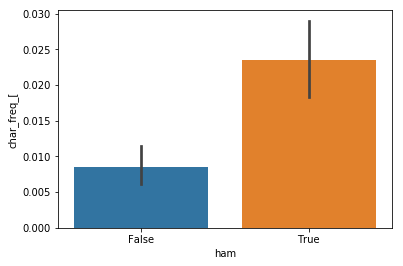

In [222]:
sns.barplot(y="char_freq_[", data=data_raw, x="ham")

### 1.3.3. Análise de sequências de letras maiúsculas

#### 1.3.3.1. Comprimento médio de sequências de carateres maiúsculos

In [32]:
media_maiusc_spam = spam.capital_run_length_average.mean()
std_average_spam = spam.capital_run_length_average.std()
max_average_spam = spam.capital_run_length_average.max()
min_average_spam = spam.capital_run_length_average.min()
print("A média do tamanho médio de sequências de caracteres maiúsculos em spam é %.2f." %(media_maiusc_spam))
print("O desvio padrão é %.2f." %(std_average_spam))
print("O máximo é %.2f." %(max_average_spam))
print("O mínimo é %.2f." %(min_average_spam))

A média do tamanho médio de sequências de caracteres maiúsculos em spam é 10.04.
O desvio padrão é 53.49.
O máximo é 1102.50.
O mínimo é 1.00.


In [33]:
media_maiusc_ham = ham.capital_run_length_average.mean()
std_average_ham = ham.capital_run_length_average.std()
max_average_ham = ham.capital_run_length_average.max()
min_average_ham = ham.capital_run_length_average.min()
print("A média do tamanho médio de sequências de caracteres maiúsculos em ham é %.2f." %(media_maiusc_ham))
print("O desvio padrão é %.2f." %(std_average_ham))
print("O máximo é %.2f." %(max_average_ham))
print("O mínimo é %.2f." %(min_average_ham))

A média do tamanho médio de sequências de caracteres maiúsculos em ham é 2.40.
O desvio padrão é 5.55.
O máximo é 251.00.
O mínimo é 1.00.


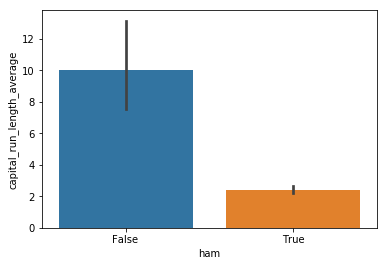

In [235]:
sns.barplot(y="capital_run_length_average", data=data_raw, x="ham")

#### 1.3.3.2. Tamanho da maior sequência de caracteres maiúsculos

In [34]:
maior_maiusc_spam = spam.capital_run_length_longest.mean()
std_maior_spam = spam.capital_run_length_longest.std()
max_maior_spam = spam.capital_run_length_longest.max()
min_maior_spam = spam.capital_run_length_longest.min()
print("A média do tamanho da maior sequência de caracteres maiúsculos em spam é %.2f." %(maior_maiusc_spam))
print("O desvio padrão é %.2f." %(std_maior_spam))
print("O máximo é %.2f." %(max_maior_spam))
print("O mínimo é %.2f." %(min_maior_spam))

A média do tamanho da maior sequência de caracteres maiúsculos em spam é 107.27.
O desvio padrão é 326.24.
O máximo é 9989.00.
O mínimo é 1.00.


In [35]:
maior_maiusc_ham = ham.capital_run_length_longest.mean()
std_maior_ham = ham.capital_run_length_longest.std()
max_maior_ham = ham.capital_run_length_longest.max()
min_maior_ham = ham.capital_run_length_longest.min()
print("A média do tamanho da maior sequência de caracteres maiúsculos em ham é %.2f." %(maior_maiusc_ham))
print("O desvio padrão é %.2f." %(std_maior_ham))
print("O máximo é %.2f." %(max_maior_ham))
print("O mínimo é %.2f." %(min_maior_ham))

A média do tamanho da maior sequência de caracteres maiúsculos em ham é 18.27.
O desvio padrão é 41.65.
O máximo é 1488.00.
O mínimo é 1.00.


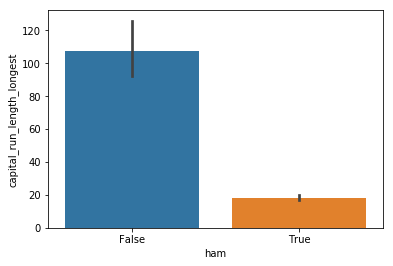

In [236]:
sns.barplot(y="capital_run_length_longest", data=data_raw, x="ham")

#### 1.3.3.3. Número total de letras maiúsculas

In [36]:
total_maiusc_spam = spam.capital_run_length_total.mean()
std_total_spam = spam.capital_run_length_total.std()
max_total_spam = spam.capital_run_length_total.max()
min_total_spam = spam.capital_run_length_total.min()
print("A média do número total caracteres maiúsculos em spam é %.2f." %(total_maiusc_spam))
print("O desvio padrão é %.2f." %(std_total_spam))
print("O máximo é %.2f." %(max_total_spam))
print("O mínimo é %.2f." %(min_total_spam))

A média do número total caracteres maiúsculos em spam é 479.30.
O desvio padrão é 864.51.
O máximo é 15841.00.
O mínimo é 2.00.


In [37]:
total_maiusc_ham = ham.capital_run_length_total.mean()
std_total_ham = ham.capital_run_length_total.std()
max_total_ham = ham.capital_run_length_total.max()
min_total_ham = ham.capital_run_length_total.min()
print("A média do número total caracteres maiúsculos em spam é %.2f." %(total_maiusc_ham))
print("O desvio padrão é %.2f." %(std_total_ham))
print("O máximo é %.2f." %(max_total_ham))
print("O mínimo é %.2f." %(min_total_ham))

A média do número total caracteres maiúsculos em spam é 158.90.
O desvio padrão é 348.29.
O máximo é 5902.00.
O mínimo é 1.00.


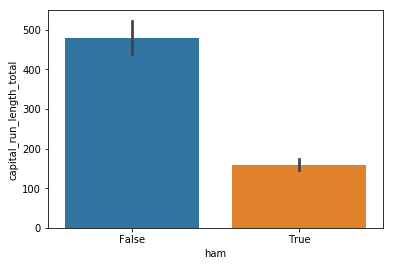

In [237]:
sns.barplot(y="capital_run_length_total", data=data_raw, x="ham")

## 1.4. Análise das labels

A label do dataset se trata da coluna "ham", a qual apresenta valores booleanos (True ou False). ham=True siginifica que o e-mail não é spam, enquanto ham=False significa que o e-mail é Spam.

In [38]:
spam_or_not = data_raw["ham"]

In [39]:
spam_or_not.value_counts()

True     2251
False    1429
Name: ham, dtype: int64

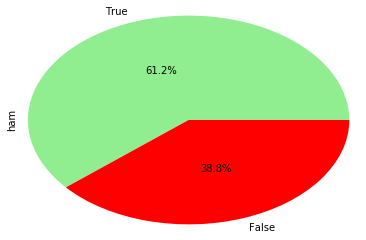

In [40]:
spam_or_not.value_counts().plot(radius=1.2, kind="pie", autopct='%1.1f%%', pctdistance=0.5, colors=["lightgreen", "red"])

<a id='parte2'></a>

# Parte 2: Implementação do classificador gaussiano e comparação com KNN

In [41]:
from sklearn.naive_bayes import GaussianNB

A seguir, será feita a implementação do classificador. Algumas features foram tiradas para efeito de experimentação.

In [42]:
train_X = data_raw.drop(labels =["Id", "char_freq_;", "char_freq_(", "ham", "char_freq_#", 'word_freq_415', 'word_freq_85', 'word_freq_857', "word_freq_650"], axis=1)
train_y = data_raw.ham

In [43]:
train_X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_[,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1.800,5,9
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.5,0.0,0.0,0.0,0.0,0.892,0.000,2.000,19,172
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.0,0.0,0.0,0.0,0.0,0.310,0.062,1.477,8,65
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.444,0.000,2.800,7,28
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,1.551,10,45


In [44]:
train_y.head()

0     True
1    False
2    False
3     True
4     True
Name: ham, dtype: bool

In [45]:
gnb = GaussianNB()

gnb.fit(train_X, train_y)

GaussianNB(priors=None)

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, train_X, train_y, cv=15)

print(scores)
print(scores.mean())

[0.80161943 0.7804878  0.83739837 0.83739837 0.83265306 0.85306122
 0.83265306 0.86122449 0.82857143 0.7877551  0.81632653 0.8244898
 0.82857143 0.82857143 0.82040816]
0.8247459800219749


Mas o valor da acurácia da predição está muito baixo. Vamos ver, agora, para o classificador K-nearest-neighbors.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
valores_obtidos = []
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, train_X, train_y, cv=10)
    valores_obtidos.append(scores.mean())

In [49]:
print(valores_obtidos)

[0.8138591872679773, 0.7752758526504232, 0.8070642161003413, 0.7915720837992647, 0.8010844583108193, 0.7953801337933413, 0.7940221665351945, 0.7893981547030255, 0.7932010417278678, 0.7861328425362206, 0.789670646306629, 0.7828741982849873, 0.7853213273129058, 0.7826053968098028, 0.7806958506663019, 0.7771639623382965, 0.7741748278903238, 0.7744450941799432, 0.7744458386267312, 0.7758015926104647, 0.7757993672964807, 0.7722734064504488, 0.7698255249493616, 0.7676508714722854, 0.7668378713685846, 0.7679263007311391, 0.7627632452133075, 0.762487819967644, 0.7597711530441332, 0.759497196626095, 0.7532449632857305, 0.7532464401397361, 0.752703694286084, 0.7529776587305027, 0.7513472199347039, 0.7516189550519483, 0.7559653203376602, 0.7548813215371226, 0.7548805851167149, 0.7546125361146989, 0.7540675809998236, 0.7565161908949383, 0.757061882430221, 0.7570618864434112, 0.75515897209677, 0.7565154544745305, 0.7548850196919219, 0.7573314082862426, 0.7557017139372317, 0.7559719722004706, 0.7573

Para encontrar o melhor valor, pode-se utilizar o seguinte algoritmo:

In [50]:
maximo = 0
index = 1
for j in range(len(valores_obtidos)):
    if valores_obtidos[j] > maximo:
        maximo = valores_obtidos[j]
        index = j
print("O maior valor obtido foi de", maximo, ", relativo ao valor k =", index+1,".")

O maior valor obtido foi de 0.8138591872679773 , relativo ao valor k = 1 .


De fato, devemos manipular melhor a base de dados para melhorar a eficiência do classificador, o que será feito a seguir.

<a id='parte3'></a>

# Parte 3: Adaptação das features

## 3.1. Compreendendo melhor o dataset

Quando pensamos numa distribuição contínua doa atributos, logo vem em mente um classificador de Naive Bayes gaussiano. No entanto, muitas das features - se não todas! - têm distribuição muito distante de uma gaussiana, pois muitas vezes os valores são iguais a zero. Assim, pode-se pensar em manipular os dados de forma a tornar a distribuição das features binária, por exemplo.

Por exemplo, e relação à palavra "order":

In [51]:
data_raw.word_freq_order.value_counts()

0.00    3068
0.09      23
0.08      17
0.10      15
0.80      15
0.16      14
0.28      12
0.23      12
0.20      12
0.05      11
0.57      10
0.66      10
0.59      10
0.58      10
0.27      10
0.24      10
0.13       9
0.38       9
0.06       9
0.54       9
0.44       9
0.32       8
0.25       8
0.19       8
0.75       8
0.31       8
1.15       8
0.48       7
0.87       7
0.17       7
        ... 
0.79       2
1.14       2
1.08       1
3.23       1
0.85       1
1.31       1
2.50       1
1.33       1
1.34       1
2.29       1
0.71       1
1.35       1
0.70       1
2.59       1
0.45       1
0.02       1
1.52       1
1.21       1
1.27       1
0.99       1
0.97       1
1.81       1
2.48       1
1.43       1
0.84       1
1.26       1
0.12       1
1.69       1
2.35       1
2.38       1
Name: word_freq_order, Length: 131, dtype: int64

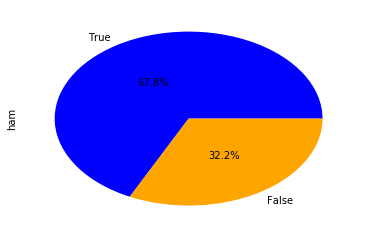

In [52]:
data_raw[data_raw.word_freq_order == 0].ham.value_counts().plot(kind="pie", autopct='%1.1f%%', pctdistance=0.5, colors=["blue", "orange"])

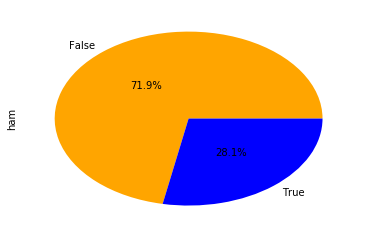

In [53]:
data_raw[data_raw.word_freq_order > 0].ham.value_counts().plot(kind="pie", autopct='%1.1f%%', pctdistance=0.5, colors=["orange", "blue"])

Assim, para os emails nos quais a palavra "order" aparece, a porcentagem de emails spam é muito maior (o que é compreensível, pois "order" se traduz, além de "ordem", para "pedido", o que poderia soar como spam de comércio, por exemplo, já que é comum a expressão "place an order" / "fazer um pedido na loja" em email marketing).

Para mais de 3000 dos data points, a palavra não aparece, o que é verdade para a maior parte dos atributos (de frequência de palavras e caracteres)! Podemos, assim, fazer uma classificação binária: *aparece* ou *não aparece*. Vamos ver mais alguns atributos:

In [54]:
data_raw.word_freq_money.value_counts()

0.00    3085
0.09      22
0.08      22
0.32      19
0.34      18
0.20      16
0.30      15
0.10      15
0.05      14
0.33      13
1.31      13
0.29      12
0.17      10
0.19      10
0.16      10
0.38      10
0.44       9
0.06       9
0.26       9
0.77       9
0.22       9
0.40       9
0.46       8
0.42       8
0.18       8
0.41       8
0.43       8
0.28       8
0.23       7
0.12       7
        ... 
1.73       1
1.40       1
1.07       1
0.85       1
0.15       1
3.33       1
1.28       1
1.61       1
9.75       1
1.94       1
0.81       1
0.99       1
2.04       1
0.73       1
0.79       1
2.32       1
1.11       1
0.94       1
0.03       1
1.17       1
3.61       1
4.16       1
1.23       1
0.83       1
1.01       1
1.42       1
1.66       1
1.46       1
1.08       1
0.66       1
Name: word_freq_money, Length: 132, dtype: int64

In [55]:
data_raw["char_freq_!"].value_counts()

0.000    1893
0.010      10
0.016       9
0.238       9
0.107       8
0.310       8
0.056       8
0.149       8
0.438       7
0.045       7
0.044       7
0.020       7
0.371       7
0.130       7
0.034       7
0.271       7
0.057       7
0.102       7
0.050       7
0.095       7
0.444       7
0.709       6
0.230       6
0.134       6
0.072       6
0.041       6
0.250       6
0.370       6
0.490       6
0.063       6
         ... 
0.346       1
1.152       1
1.060       1
0.264       1
0.180       1
0.931       1
0.620       1
0.449       1
0.975       1
0.573       1
0.582       1
1.160       1
0.115       1
0.508       1
0.574       1
0.058       1
0.567       1
0.380       1
0.960       1
0.158       1
1.048       1
0.698       1
0.595       1
1.156       1
0.442       1
5.828       1
0.819       1
0.609       1
1.524       1
0.143       1
Name: char_freq_!, Length: 863, dtype: int64


## 3.2. Manipulação do dataset

### 3.2.1. Manipulação dos atributos de frequência de palavras e caracteres

Primeiramente, trataremos esse tipo de atributo. Os atributos relativos aos valores de letras maiúsculas serão tratados posteriormente, no ponto *3.2.2.*

In [56]:
data_X_freq_raw = data_raw.drop(["Id", "ham"], axis=1)

In [57]:
data_X_freq = data_X_freq_raw.drop(["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"], axis=1)

In [58]:
data_X_freq.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.5,0.0,0.0,0.0,0.0,0.357,0.0,0.892,0.000,0.0
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.0,0.0,0.0,0.0,0.0,0.124,0.0,0.310,0.062,0.0
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.444,0.000,0.0
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0


Agora que temos o dataset preparado, vamos alterar os valores: para todas as colunas de atributos, valores diferentes de zero serão alterados para 1, enquanto 0 continuará como 0.

In [59]:
for index, row in data_X_freq.iterrows():
    for column in data_X_freq.columns:
        if row[column] > 0 :
            data_X_freq.set_value(index, column, 1)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [60]:
data_X_freq.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
data_X_freq.nunique()

word_freq_make          2
word_freq_address       2
word_freq_all           2
word_freq_3d            2
word_freq_our           2
word_freq_over          2
word_freq_remove        2
word_freq_internet      2
word_freq_order         2
word_freq_mail          2
word_freq_receive       2
word_freq_will          2
word_freq_people        2
word_freq_report        2
word_freq_addresses     2
word_freq_free          2
word_freq_business      2
word_freq_email         2
word_freq_you           2
word_freq_credit        2
word_freq_your          2
word_freq_font          2
word_freq_000           2
word_freq_money         2
word_freq_hp            2
word_freq_hpl           2
word_freq_george        2
word_freq_650           2
word_freq_lab           2
word_freq_labs          2
word_freq_telnet        2
word_freq_857           2
word_freq_data          2
word_freq_415           2
word_freq_85            2
word_freq_technology    2
word_freq_1999          2
word_freq_parts         2
word_freq_pm

Como todos os atributos tem apenas 2 tipos de valores, fica evidente que a transformação deu certo.

Juntando a coluna de "ham":

In [62]:
data_freq = data_X_freq.join(data_raw.ham)

In [63]:
data_freq.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,ham
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,True
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,False
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,True
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


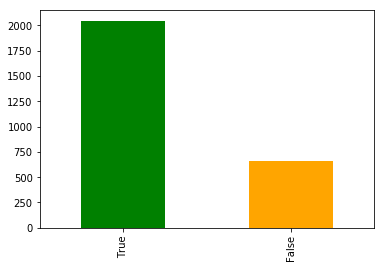

In [146]:
data_freq[data_freq.word_freq_free == 0].ham.value_counts().plot(kind="bar", color=["green", "orange"])

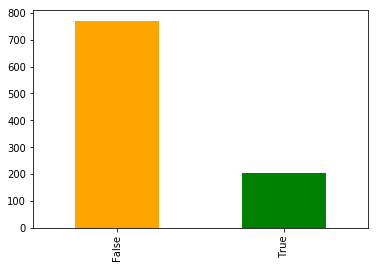

In [145]:
data_freq[data_freq.word_freq_free == 1].ham.value_counts().plot(kind="bar", color=["orange", "green"])

### 3.2.2. Manipulação dos atributos relativos à quantidade de letras maiúsculas

Esse tipo de dado é bem diferente dos anteriores. São valores cuja classificação binária deve ser melhor pensada:

In [66]:
data_X_cap_raw = data_raw.drop(["Id", "ham"], axis=1)

In [67]:
data_X_cap = data_X_cap_raw[["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]]

In [68]:
data_X_cap.head(10)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1.800,5,9
1,2.000,19,172
2,1.477,8,65
3,2.800,7,28
4,1.551,10,45
5,3.482,5,5902
6,2.166,18,143
7,2.769,21,36
8,1.722,17,267
9,1.142,4,56


Juntando a coluna de "ham":

In [69]:
data_cap = data_X_cap.join(data_raw.ham)

In [70]:
data_cap.head()

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
0,1.800,5,9,True
1,2.000,19,172,False
2,1.477,8,65,False
3,2.800,7,28,True
4,1.551,10,45,True


#### 3.2.2.1. Average

Começaremos pelo average, tentando definir um limiar de binarização:

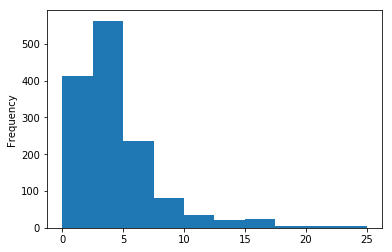

In [71]:
spam.capital_run_length_average.plot.hist(range=[0,25])

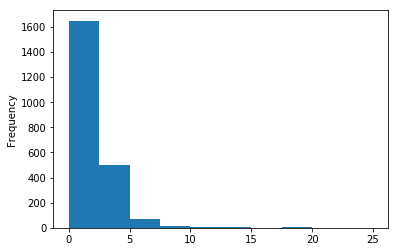

In [72]:
ham.capital_run_length_average.plot.hist(range=[0,25])

Observa-se que, para emails spam, o valor de capital_run_length_average costuma ser maior.

Do ponto 1.3.3.1, temos que os valores médios para spam e ham são, respectivamente:

Média: 10,04   e 2,40 

STD:   53,49   e 5,55

Máx.:  1102,50 e 251,00

Mín.:  1,00    e 1,00

O que faremos é utilizar o seguinte critério, considerando 7,95 = 2,4 + 5,55 (média + 1 desvio-padrão): 

Acima de 7,95: 1

Abaixo de 7,95: 0

In [73]:
for index, row in data_cap.iterrows():
    if row.capital_run_length_average > 7.95:
        data_cap.set_value(index, "capital_run_length_average", 1)
    else:
        data_cap.set_value(index, "capital_run_length_average", 0)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
data_cap.sample(10)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
1588,0.0,11,43,False
2492,0.0,11,89,True
522,0.0,26,693,True
655,0.0,17,87,True
263,0.0,16,61,False
2550,0.0,3,88,True
125,0.0,1,4,True
7,0.0,21,36,True
3577,1.0,154,9088,False
548,0.0,12,206,True


In [75]:
data_cap.capital_run_length_average.unique()

array([0., 1.])

#### 3.2.2.2. Maior

Do ponto 1.3.3.2, temos que os valores médios para spam e ham são, respectivamente:

Média: 107,27  e 18,27 

STD:  326.24   e 41.65

Máx.:  9989,00 e 1488,00

Mín.:  1,00    e 1,00

O que faremos é utilizar o seguinte critério, considerando 59,92 = 18,27 + 41,65 (média + 1 desvio-padrão): 

Acima de 59,92: 1

Abaixo de 59,92: 0

In [76]:
for index, row in data_cap.iterrows():
    if row.capital_run_length_longest > 59.92:
        data_cap.set_value(index, "capital_run_length_longest", 1)
    else:
        data_cap.set_value(index, "capital_run_length_longest", 0)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
data_cap.sample(10)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
3391,0.0,0,7,True
121,0.0,0,91,True
1861,0.0,0,237,True
1899,0.0,0,109,False
1429,0.0,0,8,True
1834,0.0,0,264,False
668,0.0,0,771,False
878,0.0,0,144,False
2781,0.0,0,156,True
161,0.0,0,45,True


In [78]:
data_cap.capital_run_length_longest.value_counts()

0    3043
1     637
Name: capital_run_length_longest, dtype: int64

#### 3.2.2.3. Total

Do ponto 1.3.3.3, temos que os valores médios para spam e ham são, respectivamente:

Média: 479.30  e 158,90 

STD:  864.51   e 348.29

Máx.: 15841,00 e 5902,00

Mín.:  2,00    e 1,00

Aqui, utilizar o critério de média + 1 desvio-padrão poderia ser uma má escolha, pois a média do spam estaria inclusa no valor. O que pode ser feito é dividir um pouco acima do valor da média. Então:

Acima de 200: 1

Abaixo de 200: 0

In [79]:
for index, row in data_cap.iterrows():
    if row.capital_run_length_total > 200:
        data_cap.set_value(index, "capital_run_length_total", 1)
    else:
        data_cap.set_value(index, "capital_run_length_total", 0)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
data_cap.sample(10)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham
2129,0.0,1,1,False
256,0.0,0,0,True
1902,0.0,0,0,True
1771,0.0,0,0,True
3650,0.0,1,1,False
2648,1.0,1,1,False
178,0.0,0,1,False
2737,0.0,0,0,True
3613,0.0,0,0,True
1409,0.0,0,0,True


In [89]:
data_cap.capital_run_length_total.value_counts()

0    2570
1    1110
Name: capital_run_length_total, dtype: int64

<a id='parte4'></a>

# Parte 4: Aplicação do classificador binário e comparação com KNN

## 4.1. Juntando tudo de novo

É preciso, agora que a binarização já foi realizada, juntar tudos os dataframes novamente.

In [97]:
binarizado = data_X_freq.join(data_cap)

In [98]:
binarizado["Id"] = data_raw["Id"]

In [129]:
binarizado.sample(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
1823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,1325
1681,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1,1,False,997
2417,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,950
2178,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,1,True,2211
1731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,1019
1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,3736
931,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0,1,False,3042
3088,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0,0,True,2924
1342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,True,2294
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,False,2749


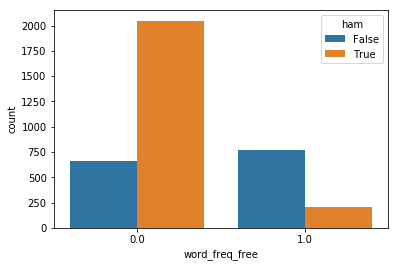

In [164]:
sns.countplot(x="word_freq_free", data=binarizado, hue="ham")

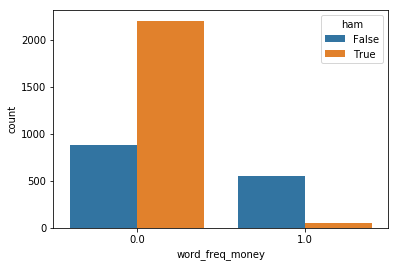

In [170]:
sns.countplot(x='word_freq_money', data=binarizado, hue='ham')

Pode-se observar que, nos casos em que "money" ou "free" aparecem, a quantidade de ham = false é muito expressiva em relação a ham = true.

## 4.2. BernoulliNB

In [103]:
from sklearn.naive_bayes import BernoulliNB

Após alguns testes, verificou-se que não utilizar os atributos relativos às letras maiúsculas permitia a obtenção de um melhor score na base de testes (no Kaggle). Assim:

In [247]:
train_X = binarizado.drop(labels =["Id", "ham", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", 'char_freq_('], axis=1)
train_y = binarizado.ham

In [248]:
train_X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
train_y.head()

0     True
1    False
2    False
3     True
4     True
Name: ham, dtype: bool

In [250]:
bnb = BernoulliNB()

bnb.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [251]:
scores = cross_val_score(bnb, train_X, train_y, cv=15)

print(scores)
print(scores.mean())

[0.87044534 0.85365854 0.91463415 0.90243902 0.91020408 0.88163265
 0.89387755 0.90612245 0.90204082 0.88979592 0.88571429 0.86530612
 0.89795918 0.86122449 0.86938776]
0.8869628238379385


Houve uma melhora significativa em relação ao Naive Bayes Gaussiano da primeira tentativa.

## 4.3. KNN

In [252]:
valores_obtidos = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, train_X, train_y, cv=10)
    valores_obtidos.append(scores.mean())

In [253]:
print(valores_obtidos)

[0.9211896283753738, 0.906516427673162, 0.9203795900060646, 0.917386765429673, 0.9195628917475647, 0.9163034950231627, 0.9198338864312111, 0.9184774080666408, 0.9182071457902115, 0.916304967863978, 0.9182078822106192, 0.9138570943892711, 0.9154890100390757, 0.9163034910099723, 0.9144005806765211, 0.9149455277650157, 0.9149455357913963, 0.9133150929824071, 0.9143983593757273, 0.9152165304750429, 0.9130433538519723, 0.9135875685332495, 0.9127708783011299, 0.9111404395053311, 0.9127701418807221, 0.9111404435185211, 0.9111419163593366, 0.9105991745188746, 0.9103274353884399, 0.9092419557207064]


Para encontrar o melhor valor, pode-se utilizar o seguinte algoritmo:

In [254]:
maximo = 0
index = 1
for j in range(len(valores_obtidos)):
    if valores_obtidos[j] > maximo:
        maximo = valores_obtidos[j]
        index = j
print("O maior valor obtido foi de", maximo, ", relativo ao valor k =", index+1,".")

O maior valor obtido foi de 0.9211896283753738 , relativo ao valor k = 1 .


Assim, a acurácia do KNN, superou a do BernoulliNB. No entanto, como a atividade refere-se ao classificador de Naive Bayes, é com ele que vamos fazer a avaliação.

<a id='parte5'></a>

# Parte 5: Avaliação do classificador

## 5.1. Definição de F Score e da bases de treino e teste 

Para realizar a avaliação do nosso classificador BernoulliNB, iremos utilizar a função a seguir:

In [82]:
def f_beta_score(p, r, b):
    '''
    RETORNA O SCORE DA AVALIAÇÃO F BETA.
    
    p: precisão do classificador
    r: recall do classificador
    b: parâmetro beta do f beta score
    '''
    numerador = p*r
    denominador = r + p * b**2
    fator = 1 + b**2
    
    return fator * numerador / denominador

No entanto, antes disso, será necessário dividir a base de treino em treino e teste, pois a base de teste em si não tem a label.

In [264]:
from sklearn.model_selection import train_test_split

In [274]:
ev_train_raw, ev_test_raw = train_test_split(binarizado, test_size=0.2, random_state=30)

In [1]:
ev_train_X = ev_train_raw.drop(labels =["Id", "ham", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", 'char_freq_('], axis=1)
ev_train_y = ev_train_raw.ham

ev_test_X = ev_test_raw.drop(labels =["Id", "ham", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", 'char_freq_('], axis=1)
ev_test_y = ev_test_raw.ham

NameError: name 'ev_train_raw' is not defined

Aplicando o classificador de BernoulliNB:

In [276]:
ev_bern = BernoulliNB()

ev_bern.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [277]:
scores = cross_val_score(ev_bern, ev_train_X, ev_train_y, cv=15)

print(scores)
print(scores.mean())

[0.89340102 0.93401015 0.83756345 0.89340102 0.93877551 0.8877551
 0.87755102 0.87755102 0.88265306 0.85714286 0.8877551  0.89795918
 0.89795918 0.86734694 0.8877551 ]
0.8879053144100282


In [280]:
ev_pred = ev_bern.predict(ev_test_X)

In [281]:
from sklearn.metrics import accuracy_score
print("A acurácia foi de", accuracy_score(ev_test_y, ev_pred))

A acurácia foi de 0.8858695652173914


## 5.2. Matriz de confusão

In [263]:
from sklearn.metrics import confusion_matrix

A seguir, está impressa a matriz de confusão do classificador. Ela relaciona os valores reais (nas colunas) dos dados aos valores classificados pelo classificador criado (nas linhas).


                                valor real
                                    
                    
                                    | label | not label
                              -------------------------
       valor classificado     label |  TP   |    FP
                              ------------------------- 
                          not label |  FN   |    TN




TP = true positive |
FP = false positive |
FN = false negative |
TN = true negative

Como a matriz de confusão impressa pelo método confusion_matrix não está disposta da mesma maneira, os valores podem ser obtidos com ravel().

In [285]:
cm = confusion_matrix(ev_test_y, ev_pred)
tn, fp, fn, tp = confusion_matrix(ev_test_y, ev_pred).ravel()
cm

array([[240,  49],
       [ 35, 412]], dtype=int64)

In [288]:
tn, fp, fn, tp 

(240, 49, 35, 412)

Algumas formas de avaliar o classificador são por sua precisão, recall e F Score (que relaciona precisão e recall, de modo que se algum deles for baixo, prejudica muito o outro). Eles estão calculados a seguir:

In [290]:
precisao = tp/(tp+fp)
print("A precisão foi de %.3f" %(precisao))

A precisão foi de 0.894


In [291]:
recall = tp/(tp+fn)
print("O recall foi de %.3f" %(recall))

O recall foi de 0.922


In [293]:
f_3 = f_beta_score(precisao, recall, 3)
print("O score F3 foi de %.3f" %(f_3))

O score F3 foi de 0.919


<a id='parte6'></a>

# Parte 6: Salvando os resultados

Fazendo o upload da base de testes:

In [267]:
test_raw = pd.read_csv("test_features.csv")

In [268]:
test_raw.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Id
0,0.0,0.00,0.17,0.52,0.17,0.00,0.17,0.0,0.69,0.17,...,0.0,0.072,0.0,0.754,0.681,0.0,4.740,52,967,1351
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.142,3,16,1687
2,0.0,0.16,0.49,0.00,0.00,0.16,0.00,0.0,0.00,0.49,...,0.0,0.119,0.0,0.149,0.000,0.0,2.178,107,244,1297
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.400,4,14,2101
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.250,2,5,3920


In [269]:
test = test_raw.drop(labels =["Id", "char_freq_(", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"], axis=1)

In [270]:
prediction = bnb.predict(test)

In [271]:
envio_raw = pd.DataFrame()
envio_raw['Id'] = test_raw.Id
envio_raw['ham'] = prediction
envio = envio_raw.set_index("Id")

In [272]:
envio.to_csv("prediction.csv")